In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

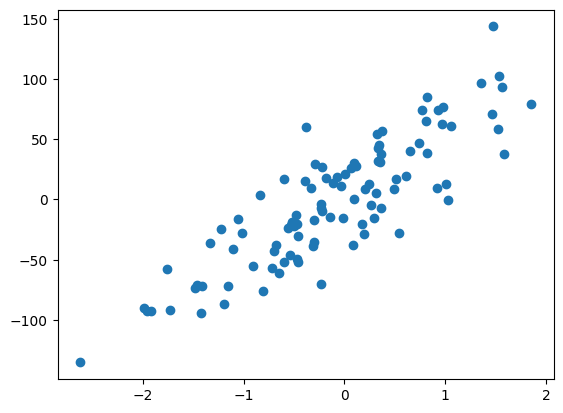

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=30, random_state=42)
X = X.reshape(-1,1)
y = y.reshape(-1,1)

plt.scatter(X, y) 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtreg = DecisionTreeRegressor(max_depth=5)
dtreg.fit(X_train, y_train)
y_pred = dtreg.predict(y_test)

r2_score(y_test, y_pred)    # overfitting thats why so low (even negative) r2 score

-0.9671822964875383

In [4]:
dtreg.get_n_leaves()    # number of leaf nodes

np.int64(28)

R2 Score : 0.33732410977271454


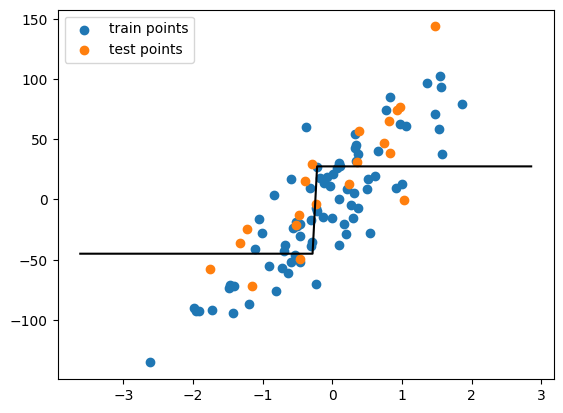

In [5]:
def plot_regression(depth=None, min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0, max_leaf_nodes=None):
    dtreg = DecisionTreeRegressor(max_depth=depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf, 
                                  min_impurity_decrease=min_impurity_decrease)
    dtreg.fit(X_train, y_train)
    y_pred = dtreg.predict(X_test)
    print(f'R2 Score : {r2_score(y_test, y_pred)}')

    X_plot = np.linspace(min(X)-1, max(X)+1, 100)
    y_plot = dtreg.predict(X_plot)

    plt.scatter(X_train, y_train, label='train points')
    plt.scatter(X_test, y_test, label='test points')
    plt.plot(X_plot, y_plot, color='black')
    plt.legend()

plot_regression(depth=1)    # one vertical split in the middle and the horizontal lines are the mean value(y axis) of the left and right points of the split

R2 Score : 0.4326168354937039


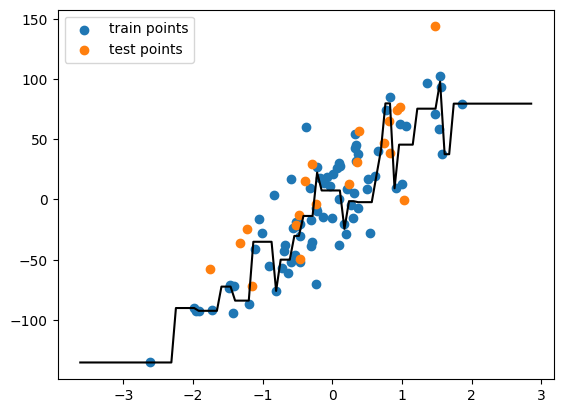

In [6]:
plot_regression(depth=5)

In [7]:
X.shape

(100, 1)

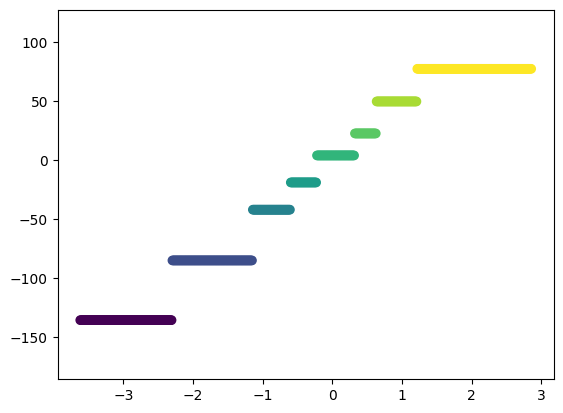

In [8]:
# to visualize the decision regions  (make a code for 3D i.e 2 features as well)

def plot_decision_regions(X, y, depth=None):
    dtreg = DecisionTreeRegressor(max_depth=depth)
    dtreg.fit(X_train, y_train)
    
    X_plot = np.linspace(min(X)-1, max(X)+1, 500)
    y_plot = dtreg.predict(X_plot)
    
    plt.scatter(X_plot, y_plot, c=y_plot)
    plt.ylim(min(y_plot)-50, max(y_plot)+50) 

plot_decision_regions(X, y, depth=3)    # the lines give the decision regions, each line represents the mean y value for that region

## Cross validation

In [9]:
param_grid = {
    'splitter' : ['best', 'random'],
    'max_depth' : [2,3,4,5],
    'min_samples_split' : list(range(2, 51, 10)),
    'min_samples_leaf' : list(range(1, 51, 10)),
    'min_impurity_decrease' : list(np.arange(0, 0.5, 0.1)),    # range can handle only integers
    'max_leaf_nodes' : [5, 10, 15],
    'max_features' : [1,2]    # only 2 columns so [1,2]
}

model = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, scoring='r2')

In [10]:
model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5], 'max_features': [1, 2],
                         'max_leaf_nodes': [5, 10, 15],
                         'min_impurity_decrease': [np.float64(0.0),
                                                   np.float64(0.1),
                                                   np.float64(0.2),
                                                   np.float64(0.30000000000000004),
                                                   np.float64(0.4)],
                         'min_samples_leaf': [1, 11, 21, 31, 41],
                         'min_samples_split': [2, 12, 22, 32, 42],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [11]:
model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': np.float64(0.2),
 'min_samples_leaf': 1,
 'min_samples_split': 22,
 'splitter': 'random'}

In [12]:
model.best_score_    # mean cross validation score 
# splitter : 'best' only gave 60% demn randomness does work

np.float64(0.6779805205243074)

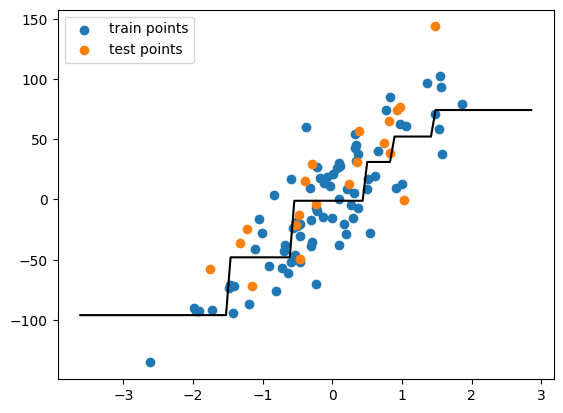

In [13]:
X_plot = np.linspace(min(X)-1, max(X)+1, 100)
y_plot = model.predict(X_plot)

plt.scatter(X_train, y_train, label='train points')
plt.scatter(X_test, y_test, label='test points')
plt.plot(X_plot, y_plot, color='black')
plt.legend()

# Feature Importance
- For multiple inputs tells us which features are the most important i.e which columns were used most for splitting
- We can do feature selection using this

In [14]:
X, y = make_regression(n_samples=100, n_features=10, noise=30, random_state=42)    # 10 features

dtreg = DecisionTreeRegressor()    # there will still be a little diff in importance everytime we run with even with splitter='best'. Whyy ?
dtreg.fit(X, y)

DecisionTreeRegressor()

In [16]:
dtreg.feature_importances_    # gives the proportion of importance of each of the column

array([0.44521942, 0.55478058])

In [17]:
# using splitter='random' we can see that the importance values are random everytime
# this shows that the splitting column was chosen randomly

dtreg = DecisionTreeRegressor(splitter='random')
for i in range(5):  
    dtreg.fit(X, y)
    print(dtreg.feature_importances_)

[0.43919148 0.56080852]
[0.41299781 0.58700219]
[0.53946125 0.46053875]
[0.52084898 0.47915102]
[0.48542717 0.51457283]
